In [1]:
# execute these commands in command prompt
!pip install cufflinks
!pip install imblearn
!pip install smote


In [2]:

#Basic libraries
import pandas as pd 
import numpy as np 


#NLTK libraries
import nltk
import re
import string
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning libraries
import sklearn 
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn import preprocessing 


#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Other miscellaneous libraries
from scipy import interp
from itertools import cycle
import cufflinks as cf
from collections import defaultdict
from collections import Counter
from imblearn.over_sampling import SMOTE


In [3]:
!pip install textblob
!pip install wordcloud
!pip install nltk
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud


filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Importing the dataset


In [4]:
process_reviews = pd.read_csv('amazon_review_modified.csv')
## print shape of dataset with rows and columns 
print ("The shape of the  data is (row, column):"+ str(process_reviews.shape))
print (process_reviews.info())

The shape of the  data is (row, column):(10261, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB
None


In [5]:
#Checking for null values
process_reviews.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [6]:
process_reviews['reviewText']=process_reviews['reviewText'].fillna('Missing')

In [7]:
#after handling missing values 
process_reviews.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         0
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [8]:
process_reviews.head(3)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.00,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.00,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.00,It Does The Job Well,1377648000,"08 28, 2013"


# preprocessing:

In [9]:
#combining review text and summary:
process_reviews['reviews']=process_reviews['reviewText']+process_reviews['summary']
process_reviews=process_reviews.drop(['reviewText', 'summary'], axis=1)
process_reviews.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.00,1393545600,"02 28, 2014","Not much to write about here, but it does exac..."
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.00,1363392000,"03 16, 2013",The product does exactly as it should and is q...
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.00,1377648000,"08 28, 2013",The primary job of this device is to block the...
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.00,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.00,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...


In [10]:
#handling stop words:

stop_words= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each', 
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above', 
             'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't", 
             'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from', 
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs', 
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all']

In [11]:
process_reviews['reviews'] = process_reviews['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
process_reviews.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.00,1393545600,"02 28, 2014","Not much write here, but exactly supposed to. ..."
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.00,1363392000,"03 16, 2013",The product exactly quite affordable.I not rea...
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.00,1377648000,"08 28, 2013",The primary job device block breath would othe...
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.00,1392336000,"02 14, 2014",Nice windscreen protects MXL mic prevents pops...
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.00,1392940800,"02 21, 2014",This pop filter great. It looks performs like ...


In [12]:
# Rarewords
drops = pd.Series(' '.join(process_reviews['reviews']).split()).value_counts()[-1000:]
process_reviews['reviews'] = process_reviews['reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))

In [13]:
# Tokenization

nltk.download("punkt")
process_reviews["reviews"].apply(lambda x: TextBlob(x).words).head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    [Not, much, write, here, but, exactly, suppose...
1    [The, product, exactly, quite, affordable.I, n...
2    [The, primary, job, device, block, breath, wou...
3    [Nice, windscreen, protects, MXL, mic, prevent...
4    [This, pop, filter, great, It, looks, performs...
Name: reviews, dtype: object

In [14]:
# Lemmatization

# Kelimeleri köklerine ayırma işlemidir.
nltk.download('wordnet')
process_reviews['reviews'] = process_reviews['reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

process_reviews['reviews'].head(10)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    Not much write here, but exactly supposed to. ...
1    The product exactly quite affordable.I not rea...
2    The primary job device block breath would othe...
3    Nice windscreen protects MXL mic prevents pops...
4    This pop filter great. It look performs like s...
5    So good I bought another one. Love heavy cord ...
6    I used monster cable years, good reason. The l...
7    I use cable run output pedal chain input Fende...
8    Perfect Epiphone Sheraton II. Monster cable we...
9    Monster make best cable lifetime warranty does...
Name: reviews, dtype: object

In [15]:
#Removing unnecessary columns
process_reviews=process_reviews.drop(['reviewerName','unixReviewTime'], axis=1)
#Creating a copy 
clean_reviews=process_reviews.copy()

In [16]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [17]:
process_reviews['reviews']=process_reviews['reviews'].apply(lambda x:review_cleaning(x))
process_reviews.head()

,reviewerID,asin,helpful,overall,reviewTime,reviews
0,A2IBPI20UZIR0U,1384719342,"[0, 0]",5.00,"02 28, 2014",not much write here but exactly supposed to fi...
1,A14VAT5EAX3D9S,1384719342,"[13, 14]",5.00,"03 16, 2013",the product exactly quite affordablei not real...
2,A195EZSQDW3E21,1384719342,"[1, 1]",5.00,"08 28, 2013",the primary job device block breath would othe...
3,A2C00NNG1ZQQG2,1384719342,"[0, 0]",5.00,"02 14, 2014",nice windscreen protects mxl mic prevents pops...
4,A94QU4C90B1AX,1384719342,"[0, 0]",5.00,"02 21, 2014",this pop filter great it look performs like st...


# 2. Visualization

In [67]:
# Calculation of Term Frequencies

tf = process_reviews["reviews"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

tf.columns = ["words", "tf"]
tf.head(10)

,words,tf
0,filter,195.00
1,pop,222.00
2,much,1985.00
3,not,5945.00
4,lowest,28.00
5,despite,59.00
6,work,2852.00
7,honestly,83.00
8,it,5246.00
9,buy,1225.00


In [19]:
tf.shape

(34605, 2)

In [20]:
tf["words"].nunique()

34605

In [21]:
tf["tf"].describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99]).T

count   34605.00
mean       16.95
std       213.64
min         1.00
5%          1.00
10%         1.00
25%         1.00
50%         1.00
75%         3.00
80%         4.00
90%        12.00
95%        38.00
99%       289.96
max     25804.00
Name: tf, dtype: float64

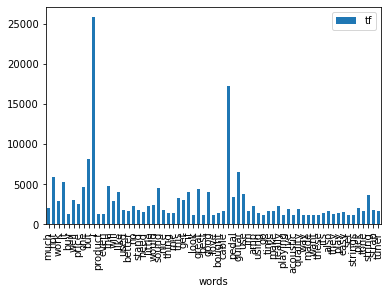

In [22]:
# Barplot

tf[tf["tf"] > 1100].plot.bar(x="words", y="tf")
plt.show()

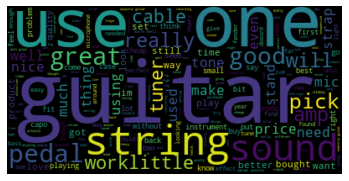

In [23]:
# Wordcloud

text = " ".join(i for i in process_reviews.reviews)
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

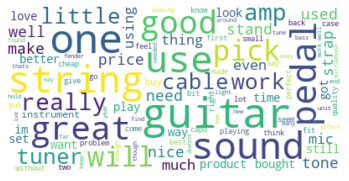

In [24]:
# a lighter graphic
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud.to_file("wordcloud.png")


# 3. Sentiment Analysis¶

In [25]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [26]:
sia.polarity_scores("The headphone was awesome")

{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}

In [27]:
sia.polarity_scores("I liked this music but it is not good as the other one")

{'neg': 0.207, 'neu': 0.666, 'pos': 0.127, 'compound': -0.298}

In [28]:
# For example, if we want to enlarge the reviews:
process_reviews["reviews"].apply(lambda x: x.upper())

0        NOT MUCH WRITE HERE BUT EXACTLY SUPPOSED TO FI...
1        THE PRODUCT EXACTLY QUITE AFFORDABLEI NOT REAL...
2        THE PRIMARY JOB DEVICE BLOCK BREATH WOULD OTHE...
3        NICE WINDSCREEN PROTECTS MXL MIC PREVENTS POPS...
4        THIS POP FILTER GREAT IT LOOK PERFORMS LIKE ST...
                               ...                        
10256                   GREAT EXPECTED THANK ALLFIVE STARS
10257    IVE THINKING TRYING NANOWEB STRING WHILE BUT I...
10258    I TRIED COATED STRING PAST  INCLUDING ELIXIRS ...
10259    WELL MADE ELIXIR DEVELOPED TAYLOR GUITARS  STR...
10260    THESE STRING REALLY QUITE GOOD BUT I WOULDNT C...
Name: reviews, Length: 10261, dtype: object

In [29]:
# Now let's calculate the scores, for example, for 10 of them
process_reviews["reviews"][0:10].apply(lambda x: sia.polarity_scores(x))

0    {'neg': 0.094, 'neu': 0.665, 'pos': 0.241, 'co...
1    {'neg': 0.0, 'neu': 0.754, 'pos': 0.246, 'comp...
2    {'neg': 0.163, 'neu': 0.766, 'pos': 0.072, 'co...
3    {'neg': 0.073, 'neu': 0.662, 'pos': 0.265, 'co...
4    {'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'comp...
5    {'neg': 0.165, 'neu': 0.523, 'pos': 0.312, 'co...
6    {'neg': 0.15, 'neu': 0.732, 'pos': 0.118, 'com...
7    {'neg': 0.086, 'neu': 0.881, 'pos': 0.033, 'co...
8    {'neg': 0.0, 'neu': 0.651, 'pos': 0.349, 'comp...
9    {'neg': 0.072, 'neu': 0.612, 'pos': 0.317, 'co...
Name: reviews, dtype: object

In [30]:
# what if we want to select only one component from this dictionary?
process_reviews["reviews"][0:10].apply(lambda x: sia.polarity_scores(x)["compound"])

0    0.65
1    0.94
2   -0.69
3    0.59
4    0.77
5    0.70
6   -0.23
7   -0.50
8    0.79
9    0.91
Name: reviews, dtype: float64

In [31]:
#Let's do it permanently:
process_reviews["polarity_score"] = process_reviews["reviews"].apply(lambda x: sia.polarity_scores(x)["compound"])
process_reviews.head(3)

,reviewerID,asin,helpful,overall,reviewTime,reviews,polarity_score
0,A2IBPI20UZIR0U,1384719342,"[0, 0]",5.00,"02 28, 2014",not much write here but exactly supposed to fi...,0.65
1,A14VAT5EAX3D9S,1384719342,"[13, 14]",5.00,"03 16, 2013",the product exactly quite affordablei not real...,0.94
2,A195EZSQDW3E21,1384719342,"[1, 1]",5.00,"08 28, 2013",the primary job device block breath would othe...,-0.69


In [32]:
def f(row):
    
    '''This function returns sentiment score based on the review text from the user'''
    
    if row['polarity_score']<0: 
        val = 'Negative'
    elif row['polarity_score'] >0: 
        val = 'Positive'
    else:
        val = 'Neutral'
    return val

In [33]:
#Applying the function in our new column
process_reviews['sentiment_label'] = process_reviews.apply(f, axis=1)
process_reviews.head(5)

,reviewerID,asin,helpful,overall,reviewTime,reviews,polarity_score,sentiment_label
0,A2IBPI20UZIR0U,1384719342,"[0, 0]",5.00,"02 28, 2014",not much write here but exactly supposed to fi...,0.65,Positive
1,A14VAT5EAX3D9S,1384719342,"[13, 14]",5.00,"03 16, 2013",the product exactly quite affordablei not real...,0.94,Positive
2,A195EZSQDW3E21,1384719342,"[1, 1]",5.00,"08 28, 2013",the primary job device block breath would othe...,-0.69,Negative
3,A2C00NNG1ZQQG2,1384719342,"[0, 0]",5.00,"02 14, 2014",nice windscreen protects mxl mic prevents pops...,0.59,Positive
4,A94QU4C90B1AX,1384719342,"[0, 0]",5.00,"02 21, 2014",this pop filter great it look performs like st...,0.77,Positive


# 4. Sentiment Modeling

In [34]:
process_reviews['sentiment_label'].value_counts()

Positive    9049
Negative    1033
Neutral      179
Name: sentiment_label, dtype: int64

## Handling time column

**spliting the time column into date and month

In [35]:
# new data frame which has date and year
new = process_reviews["reviewTime"].str.split(",", n = 1, expand = True) 
  
# making separate date column from new data frame 
process_reviews["date"]= new[0] 
  
# making separate year column from new data frame 
process_reviews["year"]= new[1] 

process_reviews=process_reviews.drop(['reviewTime'], axis=1)
process_reviews.head()

,reviewerID,asin,helpful,overall,reviews,polarity_score,sentiment_label,date,year
0,A2IBPI20UZIR0U,1384719342,"[0, 0]",5.00,not much write here but exactly supposed to fi...,0.65,Positive,02 28,2014
1,A14VAT5EAX3D9S,1384719342,"[13, 14]",5.00,the product exactly quite affordablei not real...,0.94,Positive,03 16,2013
2,A195EZSQDW3E21,1384719342,"[1, 1]",5.00,the primary job device block breath would othe...,-0.69,Negative,08 28,2013
3,A2C00NNG1ZQQG2,1384719342,"[0, 0]",5.00,nice windscreen protects mxl mic prevents pops...,0.59,Positive,02 14,2014
4,A94QU4C90B1AX,1384719342,"[0, 0]",5.00,this pop filter great it look performs like st...,0.77,Positive,02 21,2014


In [36]:
# Splitting the date 
new1 = process_reviews["date"].str.split(" ", n = 1, expand = True) 
  
# adding month to the main dataset 
process_reviews["month"]= new1[0] 
  
# adding day to the main dataset 
process_reviews["day"]= new1[1] 

process_reviews=process_reviews.drop(['date'], axis=1)
process_reviews.head()

,reviewerID,asin,helpful,overall,reviews,polarity_score,sentiment_label,year,month,day
0,A2IBPI20UZIR0U,1384719342,"[0, 0]",5.00,not much write here but exactly supposed to fi...,0.65,Positive,2014,02,28
1,A14VAT5EAX3D9S,1384719342,"[13, 14]",5.00,the product exactly quite affordablei not real...,0.94,Positive,2013,03,16
2,A195EZSQDW3E21,1384719342,"[1, 1]",5.00,the primary job device block breath would othe...,-0.69,Negative,2013,08,28
3,A2C00NNG1ZQQG2,1384719342,"[0, 0]",5.00,nice windscreen protects mxl mic prevents pops...,0.59,Positive,2014,02,14
4,A94QU4C90B1AX,1384719342,"[0, 0]",5.00,this pop filter great it look performs like st...,0.77,Positive,2014,02,21


## Using helpfulness column of the review


In [37]:
# Splitting the dataset based on comma and square bracket 
new1 = process_reviews["helpful"].str.split(",", n = 1, expand = True)
new2 = new1[0].str.split("[", n = 1, expand = True)
new3 = new1[1].str.split("]", n = 1, expand = True)

#Resetting the index
new2.reset_index(drop=True, inplace=True)
new3.reset_index(drop=True, inplace=True)

#Dropping empty columns due to splitting 
new2=new2.drop([0], axis=1)
new3=new3.drop([1], axis=1)

#Concatenating the splitted columns
helpful=pd.concat([new2, new3], axis=1)


# I found few spaces in new3, so it is better to strip all the values to find the rate
def trim_all_columns(df):
    """
    Trim whitespace from ends of each value across all series in dataframe
    """
    trim_strings = lambda x: x.strip() if isinstance(x, str) else x
    return df.applymap(trim_strings)

#Applying the function
helpful= trim_all_columns(helpful)

#Converting into integer types
helpful[0]=helpful[0].astype(str).astype(int)
helpful[1]=helpful[1].astype(str).astype(int)

#Dividing the two columns, we have 0 in the second columns when dvided gives error, so I'm ignoring those errors
try:
  helpful['result'] = helpful[1]/helpful[0]
except ZeroDivisionError:
  helpful['result']=0

#Filling the NaN values(created due to dividing) with 0
helpful['result'] = helpful['result'].fillna(0)

#Rounding of the results to two decimal places
helpful['result']=helpful['result'].round(2) 

#Attaching the results to a new column of the main dataframe
process_reviews['helpful_rate']=helpful['result']

#dropping the helpful column from main dataframe
process_reviews=process_reviews.drop(['helpful'], axis=1)

In [38]:
process_reviews.head(3)

,reviewerID,asin,overall,reviews,polarity_score,sentiment_label,year,month,day,helpful_rate
0,A2IBPI20UZIR0U,1384719342,5.00,not much write here but exactly supposed to fi...,0.65,Positive,2014,02,28,0.00
1,A14VAT5EAX3D9S,1384719342,5.00,the product exactly quite affordablei not real...,0.94,Positive,2013,03,16,0.93
2,A195EZSQDW3E21,1384719342,5.00,the primary job device block breath would othe...,-0.69,Negative,2013,08,28,1.00


**We have successfully created the helpful_rate column through processing steps. **

In [39]:
process_reviews['helpful_rate'].value_counts()

0.00    7215
1.00    2040
0.50     266
0.67     136
0.75     111
        ... 
0.56       1
0.15       1
0.13       1
0.43       1
0.69       1
Name: helpful_rate, Length: 65, dtype: int64

**0.00 indicates that the review hasn't been much helpful and 1.00 indicates that the review has been very helpful**

## Sentiments vs Helpful rate
**Relationship between sentiment of review and helpfulness of it**

In [40]:
pd.DataFrame(process_reviews.groupby('sentiment_label')['helpful_rate'].mean())

,helpful_rate
sentiment_label,
Negative,0.24
Neutral,0.18
Positive,0.27


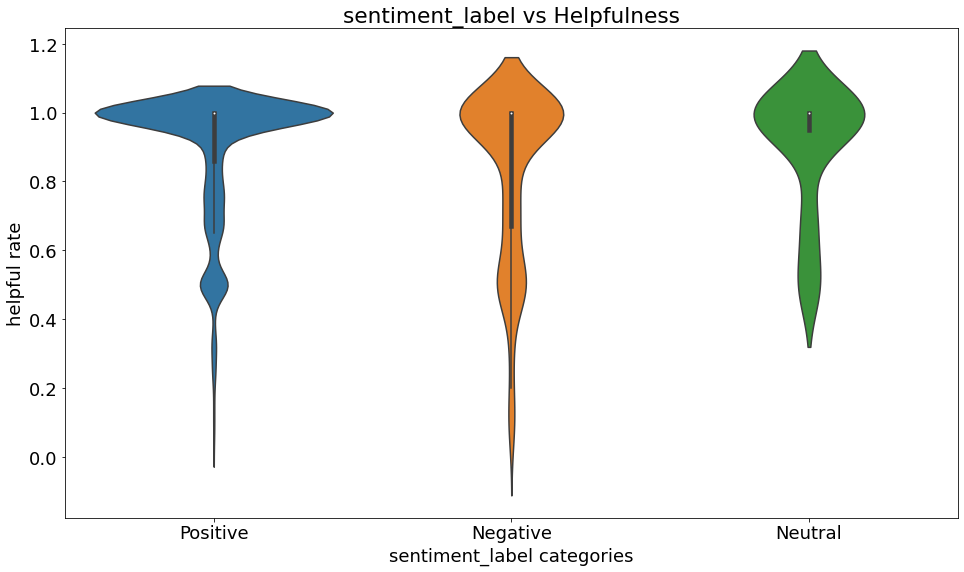

In [41]:
#plot layout
plt.rcParams.update({'font.size': 18})
rcParams['figure.figsize'] = 16,9

# Creating dataframe and removing 0 helpfulrate records
senti_help= pd.DataFrame(process_reviews, columns = ['sentiment_label', 'helpful_rate'])
senti_help = senti_help[senti_help['helpful_rate'] != 0.00] 

#Plotting phase
sns.violinplot( x=senti_help["sentiment_label"], y=senti_help["helpful_rate"])
plt.title('sentiment_label vs Helpfulness')
plt.xlabel('sentiment_label categories')
plt.ylabel('helpful rate')
plt.show()

**Insights:** <br>

**From the plot we can declare that more number of positive reviews are having high helpful rate. We got deceived by the mean value, it's better to look at a plot rather than taking some measures of central tendency under such situation.**

## Year vs Sentiment count
**In this block we will see how many reviews were posted based on sentiments in each year from 2004 to 2014**

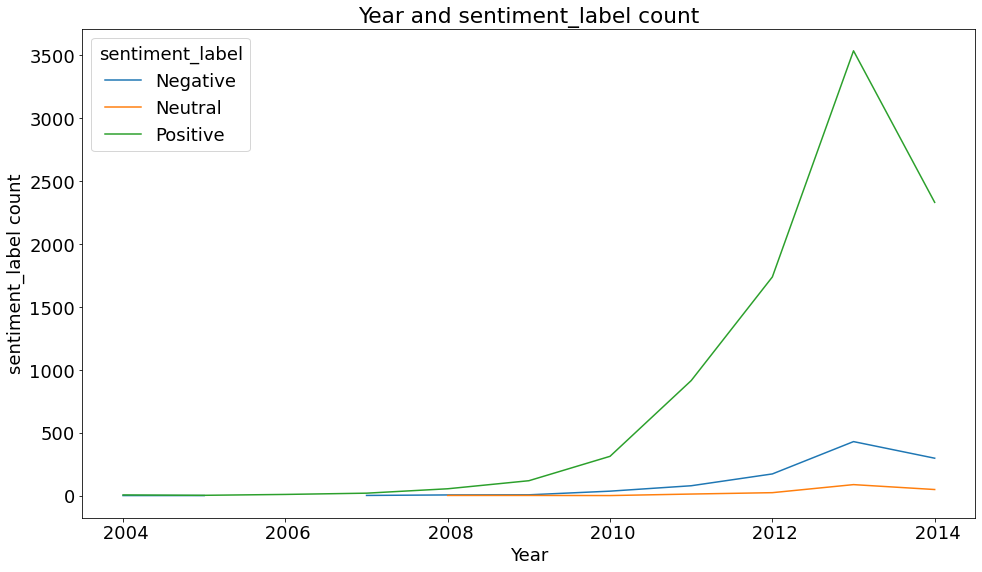

In [42]:
process_reviews.groupby(['year','sentiment_label'])['sentiment_label'].count().unstack().plot(legend=True)
plt.title('Year and sentiment_label count')
plt.xlabel('Year')
plt.ylabel('sentiment_label count')
plt.show()

**Insights:** <br>
**From the plot we can clearly see the rise in positive reviews from 2010. Reaching its peak around 2013 and there is a dip in 2014, All the review rates were dropped at this time. Negative and neutral reviews are very low as compared to the positive reviews. !**

## Day of month vs Reviews count


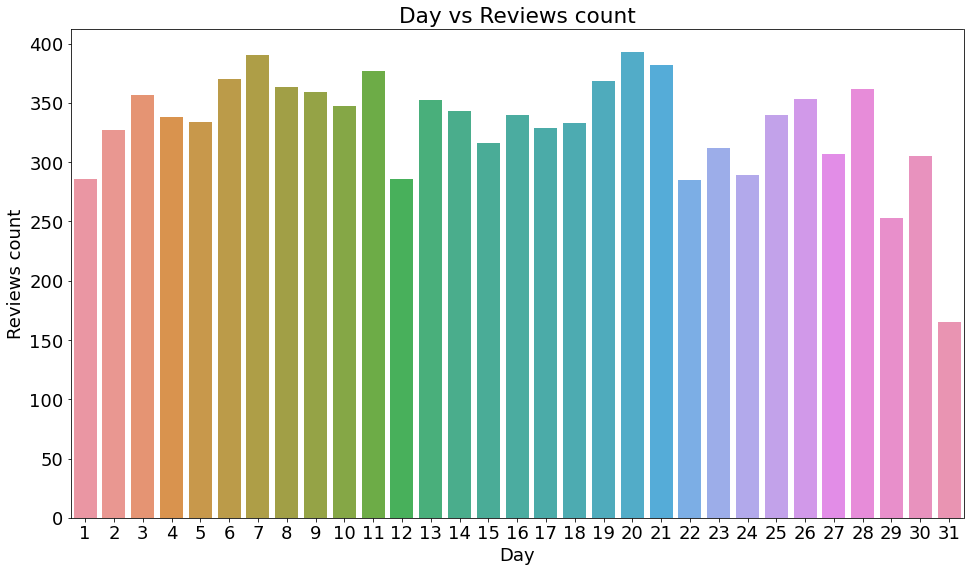

In [43]:
#Creating a dataframe
day=pd.DataFrame(process_reviews.groupby('day')['reviews'].count()).reset_index()
day['day']=day['day'].astype('int64')
day.sort_values(by=['day'])

#Plotting the graph
sns.barplot(x="day", y="reviews", data=day)
plt.title('Day vs Reviews count')
plt.xlabel('Day')
plt.ylabel('Reviews count')
plt.show()

**Insights:** <br>
**The review counts are more or less uniformly distributed.There isn't much variance between the days. But there is a huge drop at the end of month.**

## Creating few more features for text analysis
**Now, let's create polarity, review length and word count**

**Polarity:** **We use Textblob for for figuring out the rate of sentiment . It is between [-1,1] where -1 is negative and 1 is positive polarity**

**Review length:** **length of the review which includes each letters and spaces**

**Word length:** **This measures how many words are there in review**

In [44]:
process_reviews['polarity'] = process_reviews['reviews'].map(lambda text: TextBlob(text).sentiment.polarity)
process_reviews['review_len'] = process_reviews['reviews'].astype(str).apply(len)
process_reviews['word_count'] = process_reviews['reviews'].apply(lambda x: len(str(x).split()))

In [45]:
process_reviews.head()

,reviewerID,asin,overall,reviews,polarity_score,sentiment_label,year,month,day,helpful_rate,polarity,review_len,word_count
0,A2IBPI20UZIR0U,1384719342,5.00,not much write here but exactly supposed to fi...,0.65,Positive,2014,02,28,0.00,0.25,169,28
1,A14VAT5EAX3D9S,1384719342,5.00,the product exactly quite affordablei not real...,0.94,Positive,2013,03,16,0.93,0.01,363,59
2,A195EZSQDW3E21,1384719342,5.00,the primary job device block breath would othe...,-0.69,Negative,2013,08,28,1.00,0.17,334,54
3,A2C00NNG1ZQQG2,1384719342,5.00,nice windscreen protects mxl mic prevents pops...,0.59,Positive,2014,02,14,0.00,0.25,182,25
4,A94QU4C90B1AX,1384719342,5.00,this pop filter great it look performs like st...,0.77,Positive,2014,02,21,0.00,0.80,135,23


In [46]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

## Sentiment polarity distribution
**Let's look at our polarity distribution**

In [47]:
process_reviews['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')

**Insights:**
* **We have a lot of positive polarities compared to the negative polarities**
* **This polarity distributions assures the number of positive reviews we had**
* **We can say that this polarity is a normally distributed but not standard normal**


## Review Rating Distribution
**Let's check out how overall ratings are distributed**

In [48]:
process_reviews['overall'].iplot(
    kind='hist',
    xTitle='rating',
    linecolor='black',
    yTitle='count',
    title='Review Rating Distribution')

**We have a large number of 5 ratings(nearly 7k) followed by 4,3,2,1. It's linear in nature **

## Review Text Length Distribution
**Let's check out the length of review text**

In [49]:
process_reviews['review_len'].iplot(
    kind='hist',
    bins=100,
    xTitle='review length',
    linecolor='black',
    yTitle='count',
    title='Review Text Length Distribution')

**We have a right skewed distribution where most of the lengths falls between 0-1000**

## Review Text Word Count Distribution
**Let's check out the word count of review text**

In [50]:
process_reviews['word_count'].iplot(
    kind='hist',
    bins=100,
    xTitle='word count',
    linecolor='black',
    yTitle='count',
    title='Review Text Word Count Distribution')

**We have a right skewed distribution with most of the words falling between 0-200 in a a review** 

**We have completed our text ngram analysis. Let's look at wordcloud **

## Encoding target variable-sentiment
**Let's encode our target variable with Label encoder.**

In [51]:
# calling the label encoder function
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'sentiment'. 
process_reviews['sentiment_label']= label_encoder.fit_transform(process_reviews['sentiment_label']) 
  
process_reviews['sentiment_label'].unique() 

array([2, 0, 1])

In [52]:
process_reviews['sentiment_label'].value_counts()

2    9049
0    1033
1     179
Name: sentiment_label, dtype: int64

## Stemming the reviews
**Stemming is a method of deriving root word from the inflected word. Here we extract the reviews and convert the words in reviews to its root word. for example,**
* **Going->go**
* **Finally->fina**

**If you notice, the root words doesn't need to carry a semantic meaning. There is another technique knows as Lemmatization where it converts the words into root words which has a semantic meaning. Simce it takes time. I'm using stemming**

In [53]:
#taking x - input variable:
#Extracting 'reviews' for processing
review_features=process_reviews.copy()
review_features=review_features[['reviews']].reset_index(drop=True)
review_features.head()

,reviews
0,not much write here but exactly supposed to fi...
1,the product exactly quite affordablei not real...
2,the primary job device block breath would othe...
3,nice windscreen protects mxl mic prevents pops...
4,this pop filter great it look performs like st...


In [54]:
#Performing stemming on the review dataframe
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(review_features)):
    review = re.sub('[^a-zA-Z]', ' ', review_features['reviews'][i])
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stop_words]
    review = ' '.join(review)
    corpus.append(review)    

In [55]:
corpus[3]

'nice windscreen protect mxl mic prevent pop thing gooseneck margin abl hold screen posit requir care posit clamp avoid sagginggood windscreen money'

**This is how a line looks like now, as computer cannot understand words and their sentiment we need to convert these words into 1's and 0's. To encode it we use TFIDF**

In [56]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(review_features['reviews'])

In [57]:
X.shape

(10261, 5000)

**As we have considered 5000 words, we can confirm that we have 5000 columns from the shape.**

In [58]:
#Getting the target variable(encoded)
y=process_reviews['sentiment_label']

## Handling Imbalance target feature using SMOTE


In [59]:
print(f'Original dataset shape : {Counter(y)}')

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(f'Resampled dataset shape {Counter(y_res)}')

Original dataset shape : Counter({2: 9049, 0: 1033, 1: 179})
Resampled dataset shape Counter({2: 9049, 0: 9049, 1: 9049})


Great, as you can see the resampled data has equally distributed classes

## Train-test split(75:25)
**Using train test split function we are splitting the dataset into 75:25 ratio for train and test set respectively.**

In [60]:
## Divide the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=0)

<a id="section-five"></a>
# Model Building: Sentiment Analysis
**As we have successfully processed the text data, not it is just a normal machine learning problem. Where from the sparse matrix we predict the classes in target feature.**

In [61]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Model selection

**First select the best peforming model by using cross validaton. Let's consider all the classification algorithm and perform the model selection process**

In [62]:
#creating the objects
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC()
nb_cv=BernoulliNB()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,nb_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.8824676236734865
Decision Tree Test Accuracy: 0.8108380737627906
KNN Test Accuracy: 0.7784816769826763
SVC Test Accuracy: 0.881785457368402
Naive Bayes Test Accuracy: 0.809666300339185


**From the results, we can see logistic regression outdone the rest of the algorithms and all the accuracies from the results are more than 80%. That's great. So let's go with logistic regression with hyperparameter tuning.**

## Logistic Regression with Hyperparameter tuning
**We use regularization parameter and penality for parameter tuning. let's see which one to plug.**

**From the selected params, we get accuracy. Let's plug and chug**

In [63]:
logreg = LogisticRegression(C=10000.0, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.94


**We have got 94% accuracy. That ain't bad. But for classification problems we need to get confusion matrix and check f1 score rather than accuracy**

## Classification metrics
**Here we plot the confusion matrix with ROC and check our f1 score**

Confusion matrix, without normalization


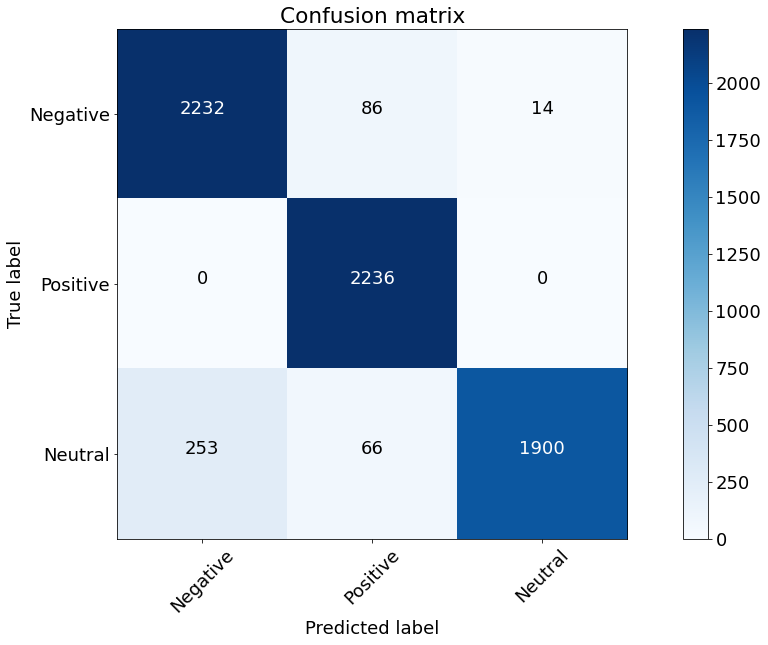

In [64]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Negative','Positive','Neutral'])

**Check out the diagonal elements(2326+2195+1854), they are correctly predicted records and rest are incorrectly classified by the algorithm**

In [65]:
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      2332
           1       0.94      1.00      0.97      2236
           2       0.99      0.86      0.92      2219

    accuracy                           0.94      6787
   macro avg       0.94      0.94      0.94      6787
weighted avg       0.94      0.94      0.94      6787



**Since predicting both positive,negative and neutral reviews are important we are considering.We got a pretty good f1 score. As we see it got a good score across all classes classified **

## ROC-AUC curve
**This is a very important curve where we decide on which threshold to setup based upon the objective criteria. 
Here we plotted ROC for different classes which can help us understand which class was classified better. 
Also we plot micro and macro averages on the roc curve.**

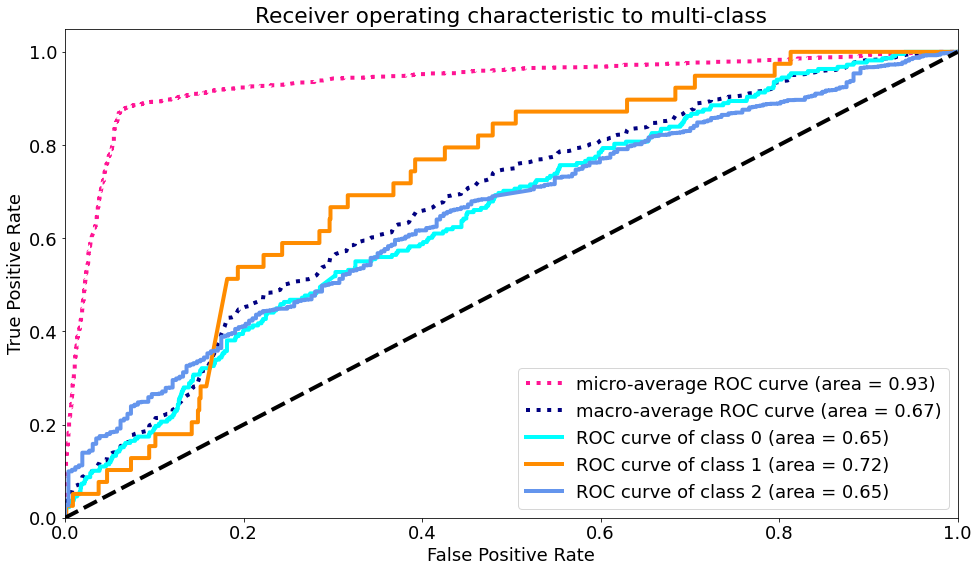

In [66]:
#Binarizing the target feature
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

#Train-Test split(80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,
                                                    random_state=0)

#OneVsRestClassifier
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=10))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

#Computing TPR and FPR
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
# aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=4,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

**Insights:**
* **Considering the ROC curve for classes, class 2 and 0 have been classified pretty well a their area under the curve is high. We can chose any threshold between 0.6-0.8 to get the optimal number of TPR and FPR**
* **Coming to micro and macro average, micro average preforms really well and macro average shows a not very good score**
* **If you don't understand what micro and macro average is, just remember the following 'A macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally), whereas a micro-average will aggregate the contributions of all classes to compute the average metric. In a multi-class classification setup, micro-average is preferable if you suspect there might be class imbalance'**